In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
import src.lib.utility_classfier as uclf
import src.lib.optimal_threhold_related as thres
import src.lib.fairness_tests as fair

In [2]:
data_path='/Users/lifuchen/Desktop/research/data.csv'
df = pd.read_csv(data_path)

In [3]:
y = df.Class
X = df.drop(['GRID','Class'], axis=1)
X.shape

(109490, 87)

In [4]:
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('df_train num',df_train.shape[0])
print('df_test num',df_test.shape[0])

df_train num 87592
df_test num 21898


In [5]:
y_test_male = y_test[df_test['GENDER']==0]
sum(y_test_male)
y_test_male.shape

(7684,)

In [6]:
y_test_female = y_test[df_test['GENDER']==1]
sum(y_test_female)
y_test_female.shape

(14214,)

In [7]:
df_test_male = df_test[df_test['GENDER']==0]
X_test_male = df_test_male.drop(['GENDER'], axis=1).values
X_test_male.shape

(7684, 86)

In [8]:
df_test_female = df_test[df_test['GENDER']==1]
X_test_female = df_test_female.drop(['GENDER'], axis=1).values
X_test_female.shape

(14214, 86)

In [9]:
X_train = df_train.drop(['GENDER'], axis=1).values
X_test = df_test.drop(['GENDER'], axis=1).values

In [10]:
import sklearn.preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_scaled = max_abs_scaler.fit_transform(X_train)
X_test_scaled = max_abs_scaler.transform(X_test)
X_test_male_scaled = max_abs_scaler.transform(X_test_male)
X_test_female_scaled = max_abs_scaler.transform(X_test_female)

In [11]:
def case_contro_ratio(y):
    num_of_case = y[y==1].shape[0]
    num_of_control = y[y==0].shape[0]
    ratio = num_of_control/num_of_case
    return ratio, num_of_case, num_of_control
pos_ratio = case_contro_ratio(y_test)[1]/y_test.shape[0]

In [ ]:
y_score_dt = uclf.decision_tree(X_train_scaled, y_train,X_test_scaled, y_test)
uclf.compute_roc(y_test_white,y_score_dt,'decision tree')
y_score_gb = uclf.gradiant_boosting(X_train_scaled, y_train,X_test_scaled, y_test)
uclf.compute_roc(y_test_white,y_score_gb,'gradiant_boosting')
y_score_rf = uclf.random_forest(X_train_scaled, y_train,X_test_scaled, y_test)
uclf.compute_roc(y_test_white,y_score_rf,'random_forest')

In [12]:
y_score_dt_male = uclf.decision_tree(X_train_scaled, y_train, X_test_male_scaled, y_test_male)

0.2662970663670978
0.3022478088653378
Classification report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6860
           1       0.22      0.00      0.01       824

    accuracy                           0.89      7684
   macro avg       0.56      0.50      0.48      7684
weighted avg       0.82      0.89      0.84      7684

Confusion_matrix
[[6846   14]
 [ 820    4]]
done in 0.728931s


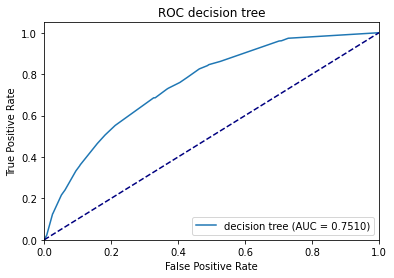

In [13]:
uclf.compute_roc(y_test_male,y_score_dt_male,'decision tree')

In [14]:
y_score_dt_female = uclf.decision_tree(X_train_scaled, y_train, X_test_female_scaled, y_test_female)

0.2662970663670978
0.24645688414664021
Classification report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13093
           1       0.10      0.00      0.00      1121

    accuracy                           0.92     14214
   macro avg       0.51      0.50      0.48     14214
weighted avg       0.86      0.92      0.88     14214

Confusion_matrix
[[13075    18]
 [ 1119     2]]
done in 0.716617s


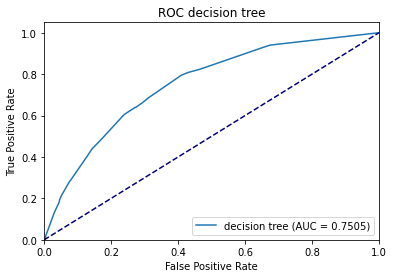

In [15]:
uclf.compute_roc(y_test_female,y_score_dt_female,'decision tree')

In [16]:
eod_dt = fair.get_EOD(y_test_male, y_score_dt_male,y_test_female, y_score_dt_female)
eod_dt

threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.361
threshold:0.2, J-value:0.178
threshold:0.30000000000000004, J-value:0.1
threshold:0.4, J-value:0.003
threshold:0.5, J-value:0.003
threshold:0.6000000000000001, J-value:-0.001
threshold:0.7000000000000001, J-value:-0.001
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
True positive rate of class 1 is  0.732
threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.367
threshold:0.2, J-value:0.161
threshold:0.30000000000000004, J-value:0.093
threshold:0.4, J-value:0.001
threshold:0.5, J-value:0.001
threshold:0.6000000000000001, J-value:0.0
threshold:0.7000000000000001, J-value:0.0
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
True positive rate of class 2 is  0.64


0.09199999999999997

In [17]:
sp_dt = fair.get_SP(y_test_male, y_score_dt_male,y_test_female, y_score_dt_female)
sp_dt

threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.361
threshold:0.2, J-value:0.178
threshold:0.30000000000000004, J-value:0.1
threshold:0.4, J-value:0.003
threshold:0.5, J-value:0.003
threshold:0.6000000000000001, J-value:-0.001
threshold:0.7000000000000001, J-value:-0.001
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
Positive prediction rate of class 1 is  0.409
threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.367
threshold:0.2, J-value:0.161
threshold:0.30000000000000004, J-value:0.093
threshold:0.4, J-value:0.001
threshold:0.5, J-value:0.001
threshold:0.6000000000000001, J-value:0.0
threshold:0.7000000000000001, J-value:0.0
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
Positive prediction rate of class 2 is  0.302


1.3543046357615893

In [18]:
y_score_rf_male = uclf.random_forest(X_train_scaled, y_train, X_test_male_scaled, y_test_male)

Classification report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6860
           1       0.57      0.00      0.01       824

    accuracy                           0.89      7684
   macro avg       0.73      0.50      0.48      7684
weighted avg       0.86      0.89      0.84      7684

Confusion_matrix
[[6857    3]
 [ 820    4]]
done in 22.606230s


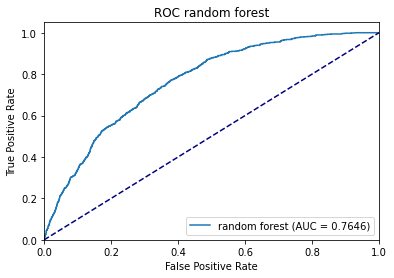

In [19]:
uclf.compute_roc(y_test_male,y_score_rf_male,'random forest')

In [20]:
y_score_rf_female = uclf.random_forest(X_train_scaled, y_train, X_test_female_scaled, y_test_female)

Classification report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13093
           1       0.50      0.00      0.00      1121

    accuracy                           0.92     14214
   macro avg       0.71      0.50      0.48     14214
weighted avg       0.89      0.92      0.88     14214

Confusion_matrix
[[13092     1]
 [ 1120     1]]
done in 22.680903s


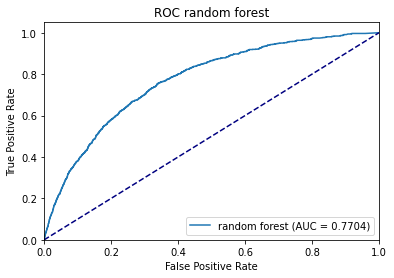

In [21]:
uclf.compute_roc(y_test_female,y_score_rf_female,'random forest')

In [22]:
eod_rf = fair.get_EOD(y_test_male, y_score_rf_male,y_test_female, y_score_rf_female)
eod_rf

threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.37900000000000006
threshold:0.2, J-value:0.32799999999999996
threshold:0.30000000000000004, J-value:0.123
threshold:0.4, J-value:0.024
threshold:0.5, J-value:0.005
threshold:0.6000000000000001, J-value:0.0
threshold:0.7000000000000001, J-value:0.0
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
True positive rate of class 1 is  0.812
threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.40199999999999997
threshold:0.2, J-value:0.27
threshold:0.30000000000000004, J-value:0.09799999999999999
threshold:0.4, J-value:0.023
threshold:0.5, J-value:0.001
threshold:0.6000000000000001, J-value:0.0
threshold:0.7000000000000001, J-value:0.0
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
True positive rate of class 2 is  0.695


0.1170000000000001

In [23]:
sp_rf = fair.get_SP(y_test_male, y_score_rf_male,y_test_female, y_score_rf_female)
sp_rf

threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.37900000000000006
threshold:0.2, J-value:0.32799999999999996
threshold:0.30000000000000004, J-value:0.123
threshold:0.4, J-value:0.024
threshold:0.5, J-value:0.005
threshold:0.6000000000000001, J-value:0.0
threshold:0.7000000000000001, J-value:0.0
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
Positive prediction rate of class 1 is  0.474
threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.40199999999999997
threshold:0.2, J-value:0.27
threshold:0.30000000000000004, J-value:0.09799999999999999
threshold:0.4, J-value:0.023
threshold:0.5, J-value:0.001
threshold:0.6000000000000001, J-value:0.0
threshold:0.7000000000000001, J-value:0.0
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
Positive prediction rate of class 2 is  0.325


1.4584615384615383

In [24]:
y_score_gb = uclf.gradiant_boosting(X_train_scaled, y_train,X_test_scaled, y_test)

Classification report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19953
           1       0.36      0.01      0.03      1945

    accuracy                           0.91     21898
   macro avg       0.63      0.51      0.49     21898
weighted avg       0.86      0.91      0.87     21898

Confusion_matrix
[[19906    47]
 [ 1919    26]]
done in 38.902443s


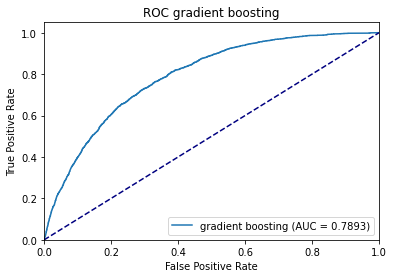

In [25]:
uclf.compute_roc(y_test,y_score_gb,'gradient boosting')

In [26]:
y_score_gb_male = uclf.gradiant_boosting(X_train_scaled, y_train, X_test_male_scaled, y_test_male)

Classification report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6860
           1       0.35      0.01      0.03       824

    accuracy                           0.89      7684
   macro avg       0.62      0.51      0.49      7684
weighted avg       0.84      0.89      0.84      7684

Confusion_matrix
[[6838   22]
 [ 812   12]]
done in 38.896889s


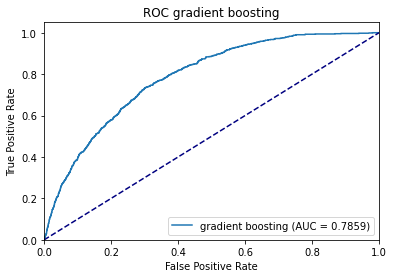

In [27]:
uclf.compute_roc(y_test_male,y_score_gb_male,'gradient boosting')

In [28]:
y_score_gb_female = uclf.gradiant_boosting(X_train_scaled, y_train, X_test_female_scaled, y_test_female)

Classification report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13093
           1       0.36      0.01      0.02      1121

    accuracy                           0.92     14214
   macro avg       0.64      0.51      0.49     14214
weighted avg       0.88      0.92      0.88     14214

Confusion_matrix
[[13068    25]
 [ 1107    14]]
done in 38.913256s


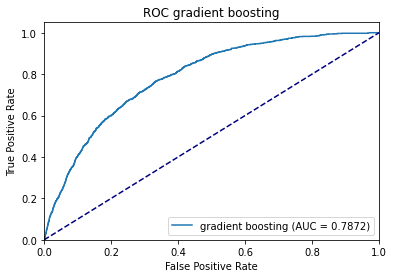

In [29]:
uclf.compute_roc(y_test_female,y_score_gb_female,'gradient boosting')

In [30]:
eod_gb = fair.get_EOD(y_test_male, y_score_gb_male,y_test_female, y_score_gb_female)
eod_gb

threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.42100000000000004
threshold:0.2, J-value:0.31
threshold:0.30000000000000004, J-value:0.166
threshold:0.4, J-value:0.05500000000000001
threshold:0.5, J-value:0.012
threshold:0.6000000000000001, J-value:0.001
threshold:0.7000000000000001, J-value:0.0
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
True positive rate of class 1 is  0.772
threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.41300000000000003
threshold:0.2, J-value:0.23399999999999999
threshold:0.30000000000000004, J-value:0.108
threshold:0.4, J-value:0.04
threshold:0.5, J-value:0.01
threshold:0.6000000000000001, J-value:0.0
threshold:0.7000000000000001, J-value:0.0
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
True positive rate of class 2 is  0.643


0.129

In [31]:
sp_gb = fair.get_SP(y_test_male, y_score_gb_male,y_test_female, y_score_gb_female)
sp_gb

threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.42100000000000004
threshold:0.2, J-value:0.31
threshold:0.30000000000000004, J-value:0.166
threshold:0.4, J-value:0.05500000000000001
threshold:0.5, J-value:0.012
threshold:0.6000000000000001, J-value:0.001
threshold:0.7000000000000001, J-value:0.0
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
Positive prediction rate of class 1 is  0.396
threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.41300000000000003
threshold:0.2, J-value:0.23399999999999999
threshold:0.30000000000000004, J-value:0.108
threshold:0.4, J-value:0.04
threshold:0.5, J-value:0.01
threshold:0.6000000000000001, J-value:0.0
threshold:0.7000000000000001, J-value:0.0
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
Positive prediction rate of class 2 is  0.263


1.505703422053232

In [32]:
y_score = uclf.logic_regression(X_train_scaled, y_train,X_test_scaled, y_test,10)

0.2607852080948984
0.25775202070645253
Classification report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19953
           1       0.40      0.03      0.06      1945

    accuracy                           0.91     21898
   macro avg       0.65      0.51      0.51     21898
weighted avg       0.87      0.91      0.87     21898

Confusion_matrix
[[19857    96]
 [ 1882    63]]
done in 0.642312s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


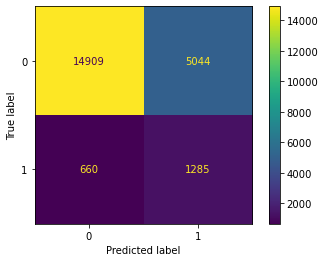

In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = np.copy(y_score)
y_pred[y_pred >= 0.1] = 1
y_pred[y_pred < 0.1] = 0
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [34]:
threshold_mixed = thres.get_optimal_threshold_Jvalue(y_test, y_score)
threshold_mixed

threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.40800000000000003
threshold:0.2, J-value:0.258
threshold:0.30000000000000004, J-value:0.14
threshold:0.4, J-value:0.066
threshold:0.5, J-value:0.027
threshold:0.6000000000000001, J-value:0.009000000000000001
threshold:0.7000000000000001, J-value:0.003
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0


(0.1, 0.40800000000000003)

In [35]:
tpr_mixed = thres.calculate_tpr(y_test, y_score, threshold=0.1)
tpr_mixed

0.661

In [36]:
tpr_mixed = thres.calculate_positive_prediction(y_test, y_score, threshold=0.1)
tpr_mixed

0.289

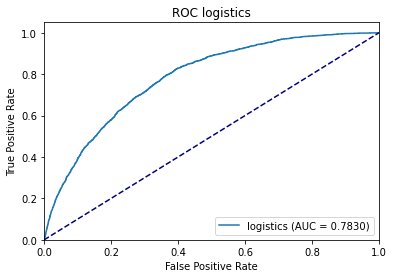

In [37]:
uclf.compute_roc(y_test,y_score,'logistics')

Average precision-recall score: 0.25


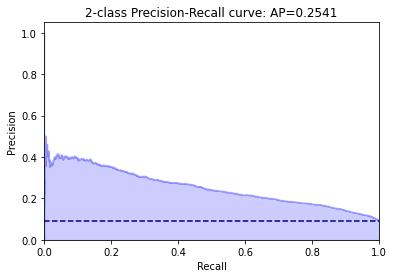

In [38]:
uclf.plot_prc(y_test,y_score,pos_ratio)

In [39]:
y_score_male = uclf.logic_regression(X_train_scaled, y_train,X_test_male_scaled, y_test_male, 10)

0.2607852080948984
0.2937670130546365
Classification report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6860
           1       0.42      0.04      0.06       824

    accuracy                           0.89      7684
   macro avg       0.66      0.51      0.50      7684
weighted avg       0.84      0.89      0.85      7684

Confusion_matrix
[[6820   40]
 [ 795   29]]
done in 0.607718s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


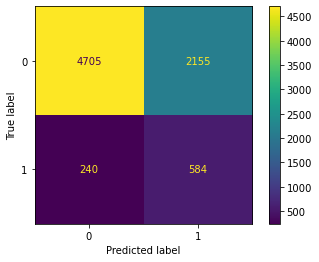

In [40]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_male = np.copy(y_score_male)
y_pred_male[y_pred_male >= 0.1] = 1
y_pred_male[y_pred_male < 0.1] = 0
cm2 = confusion_matrix(y_test_male, y_pred_male)
cm_display2 = ConfusionMatrixDisplay(cm2).plot()

In [41]:
tpr_male = thres.calculate_tpr(y_test_male, y_score_male, threshold=0.2)
tpr_male

0.387

In [42]:
pd_male = thres.calculate_positive_prediction(y_test_male, y_score_male, threshold=0.2)
pd_male

0.133

In [43]:
y_score_female = uclf.logic_regression(X_train_scaled, y_train,X_test_female_scaled, y_test_female,10)

0.2607852080948984
0.23828253982820255
Classification report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13093
           1       0.38      0.03      0.06      1121

    accuracy                           0.92     14214
   macro avg       0.65      0.51      0.51     14214
weighted avg       0.88      0.92      0.89     14214

Confusion_matrix
[[13037    56]
 [ 1087    34]]
done in 0.622341s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


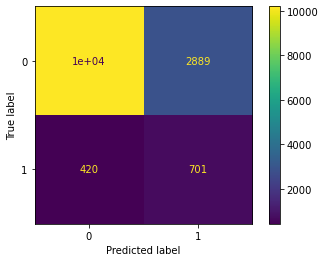

In [44]:
y_pred_female = np.copy(y_score_female)
y_pred_female[y_pred_female >= 0.1] = 1
y_pred_female[y_pred_female < 0.1] = 0
cm3 = confusion_matrix(y_test_female, y_pred_female)
cm_display3 = ConfusionMatrixDisplay(cm3).plot()

In [45]:
eod = fair.get_EOD(y_test_male, y_score_male,y_test_female, y_score_female)
eod

threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.39499999999999996
threshold:0.2, J-value:0.28400000000000003
threshold:0.30000000000000004, J-value:0.153
threshold:0.4, J-value:0.071
threshold:0.5, J-value:0.029000000000000005
threshold:0.6000000000000001, J-value:0.011
threshold:0.7000000000000001, J-value:0.005
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
True positive rate of class 1 is  0.709
threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.404
threshold:0.2, J-value:0.23399999999999999
threshold:0.30000000000000004, J-value:0.129
threshold:0.4, J-value:0.06099999999999999
threshold:0.5, J-value:0.026
threshold:0.6000000000000001, J-value:0.008
threshold:0.7000000000000001, J-value:0.001
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
True positive rate of class 2 is  0.625


0.08399999999999996

In [46]:
sp = fair.get_SP(y_test_male, y_score_male,y_test_female, y_score_female)
sp

threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.39499999999999996
threshold:0.2, J-value:0.28400000000000003
threshold:0.30000000000000004, J-value:0.153
threshold:0.4, J-value:0.071
threshold:0.5, J-value:0.029000000000000005
threshold:0.6000000000000001, J-value:0.011
threshold:0.7000000000000001, J-value:0.005
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
Positive prediction rate of class 1 is  0.356
threshold:0.0, J-value:0.0
threshold:0.1, J-value:0.404
threshold:0.2, J-value:0.23399999999999999
threshold:0.30000000000000004, J-value:0.129
threshold:0.4, J-value:0.06099999999999999
threshold:0.5, J-value:0.026
threshold:0.6000000000000001, J-value:0.008
threshold:0.7000000000000001, J-value:0.001
threshold:0.8, J-value:0.0
threshold:0.9, J-value:0.0
Positive prediction rate of class 2 is  0.253


1.4071146245059287

In [47]:
tpr_female = thres.calculate_tpr(y_test_female, y_score_female, threshold=0.2)
tpr_female

0.303

In [48]:
pd_female = thres.calculate_positive_prediction(y_test_female, y_score_female, threshold=0.2)
pd_female

0.088

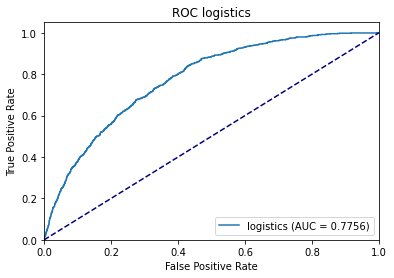

In [49]:
uclf.compute_roc(y_test_male,y_score_male,'logistics')

Average precision-recall score: 0.29


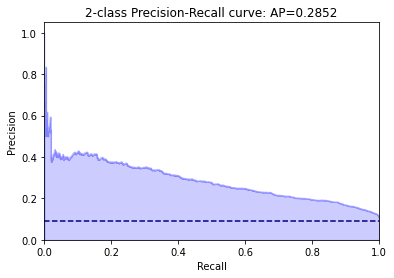

In [50]:
uclf.plot_prc(y_test_male,y_score_male,pos_ratio)

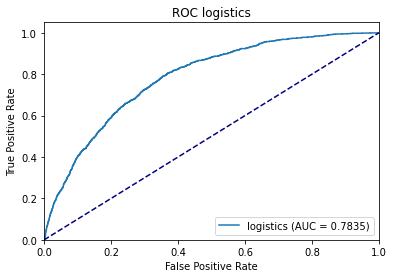

In [51]:
uclf.compute_roc(y_test_female,y_score_female,'logistics')

Average precision-recall score: 0.23


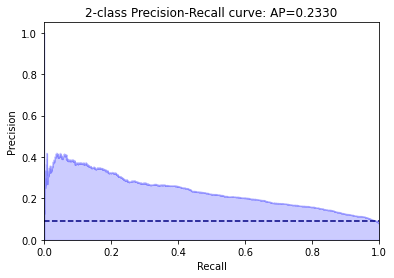

In [52]:
uclf.plot_prc(y_test_female,y_score_female,pos_ratio)

In [53]:
male = df[df['GENDER'] == 0]

female = df[df['GENDER'] == 1]

affected = df[df['Class'] == 1]

unaffected = df[df['Class'] == 0]

male_unaffected, male_affected = [x for _, x in male.groupby(male['Class'] == 1)]
female_unaffected, female_affected = [x for _, x in female.groupby(female['Class'] == 1)]

In [54]:
male_unaffected.shape[0]

34603

In [55]:
male_affected.shape[0]

4250

In [56]:
female_unaffected.shape[0]

65063

In [57]:
female_affected.shape[0]

5574